In [217]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
X.shape

(307, 2)

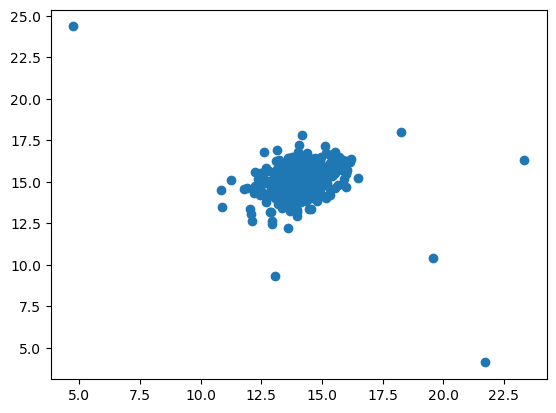

In [218]:

plt.scatter(X[:,0],X[:,1])
plt.show()

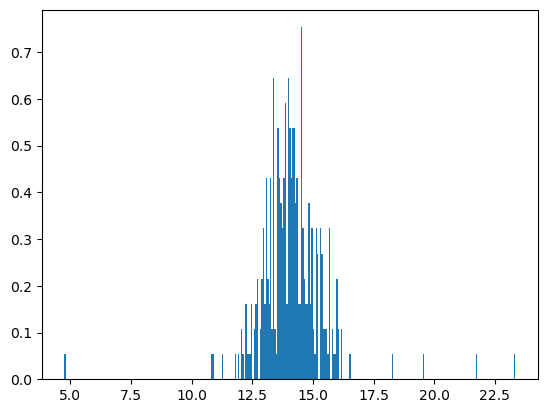

In [219]:
plt.hist(X[:,0], density=True, bins=307)  
plt.show()

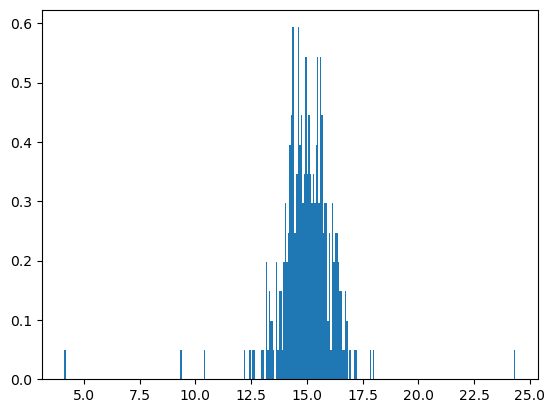

In [220]:
plt.hist(X[:,1], density=True, bins=307)  
plt.show()

In [221]:
def estimate_gaussian(X):  
    sum = 0
    for  i in range (0,X.shape[0]):
        sum += X[i]
    mu = sum/X.shape[0]
    sum_2 = 0
    for  i in range (0,X.shape[0]):
        sum_2 += (X[i]-mu)**2
    x = sum_2/(X.shape[0])
    sigma = np.sqrt(x)
    return mu, sigma
 
mean,sigma = estimate_gaussian(X)
mean, sigma

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))

In [222]:
Xval = data['Xval']  
yval = data['yval']

Xval.shape

(307, 2)

In [223]:
from scipy import stats
p = np.zeros((X.shape[0], X.shape[1]))
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
p[:, 0] = stats.norm.pdf(X[:,0],mean[0],sigma[0])
stats.norm.pdf(X[:50,0],mean[0],sigma[0])


array([0.21620977, 0.25745208, 0.29413223, 0.24721192, 0.27251547,
       0.2918119 , 0.18713958, 0.15117648, 0.09356331, 0.166609  ,
       0.29338708, 0.29448769, 0.25559237, 0.25595621, 0.2932714 ,
       0.2944456 , 0.29288017, 0.28518331, 0.27727759, 0.09489765,
       0.27027271, 0.29342161, 0.24110555, 0.29304288, 0.19607729,
       0.15652979, 0.27590459, 0.25749622, 0.27667047, 0.2834953 ,
       0.17068283, 0.29318613, 0.20432637, 0.19577297, 0.10897052,
       0.24595126, 0.14063746, 0.29463374, 0.28052751, 0.29371857,
       0.28168158, 0.22524293, 0.28218942, 0.29429662, 0.26674962,
       0.28856013, 0.11137104, 0.29467721, 0.28904196, 0.18556585])

In [224]:
p[:, 1] = stats.norm.pdf(X[:,1],mean[1],sigma[1])
stats.norm.pdf(X[:50,1],mean[1],sigma[1])

array([0.29928475, 0.19539236, 0.24631896, 0.20353285, 0.23369303,
       0.14549894, 0.25600918, 0.24151341, 0.19949913, 0.30423483,
       0.09037578, 0.28766234, 0.27797121, 0.27173864, 0.12881868,
       0.28087687, 0.29975441, 0.3046332 , 0.24946431, 0.10258106,
       0.28011206, 0.30119392, 0.15516046, 0.29735436, 0.21044271,
       0.15894753, 0.28665754, 0.29485051, 0.2921371 , 0.27033816,
       0.29362853, 0.30032058, 0.30239897, 0.30455403, 0.19181707,
       0.18619014, 0.25129732, 0.27874829, 0.25820116, 0.2893207 ,
       0.22787374, 0.2951411 , 0.29681019, 0.2914136 , 0.26040452,
       0.20393606, 0.29689312, 0.23859757, 0.26899018, 0.19394144])

In [225]:
pval[:, 0] = stats.norm.pdf(Xval[:,0],mean[0],sigma[0])
pval[:, 1] = stats.norm.pdf(Xval[:,1],mean[1],sigma[1])

In [226]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    thresholds = np.linspace(pval.min(), pval.max(), 1000)
    best_f1 = 0
    for eps in thresholds:
        ypred = (pval[:, 0] < eps) | (pval[:, 1] < eps)
        new = f1_score(yval, ypred.astype(int))
        if new > best_f1:
            best_f1 = new
            best_epsilon = eps
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.0006108136634440508, 0.8750000000000001)

In [227]:
indexes = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in indexes][0]

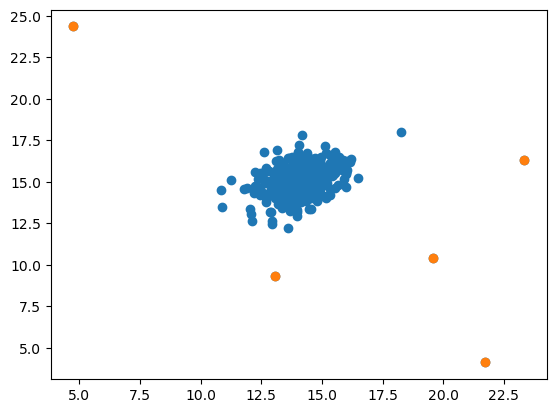

In [229]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1])
plt.show()